In [1]:
#import dataset for plots
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets
def get_iris_df():
  ds = sklearn.datasets.load_iris()
  df = pd.DataFrame(ds['data'],
    columns = ds['feature_names'])
  code_species_map = dict(zip(
    range(3), ds['target_names']))
  df['species'] = [code_species_map[c]
    for c in ds['target']]
  return df
df = get_iris_df()
#retrieve dataset tobe uploaded
df.to_csv("datasetIris.csv",index=False)


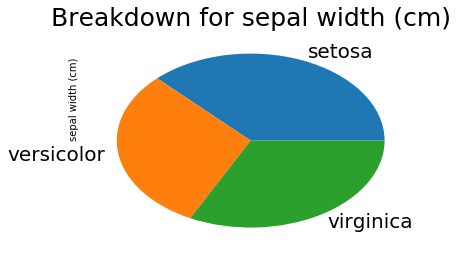

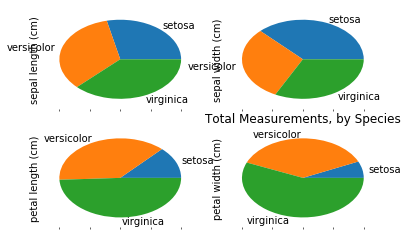

In [2]:
#Pie Chart plot
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
plt.title('Breakdown for ' + var, fontsize=25)
plt.savefig('iris_pie_for_one_variable.jpg')
plt.show()

#Pie chart for each varible
plt.close()
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='pie', subplots=True, 
layout=(2,2), legend=False)
plt.title('Total Measurements, by Species')
plt.savefig('iris_pie_for_each_variable.jpg')
plt.show()

In Pie charts it can be seen that Setosa has the largest sepal width and length whereas the virginica has the largest petal width and length. It can be seen that color use is important in these type of charts.

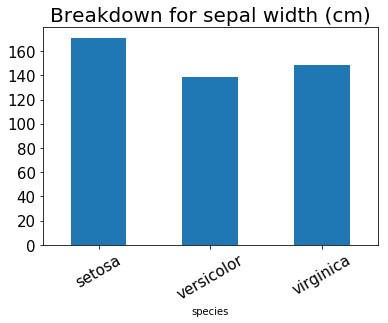

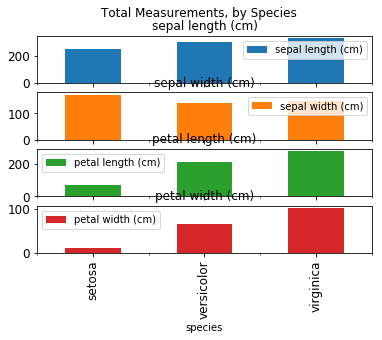

In [3]:
#Bar Chart plot
plt.close()
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='bar', fontsize=15, 
rot=30)
plt.title('Breakdown for ' + var, fontsize=20)
plt.savefig('iris_bar_for_one_variable.jpg')
plt.show()

#All in 1
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(
    kind='bar', subplots=True, fontsize=12)
plt.suptitle('Total Measurements, by Species')
plt.savefig('iris_bar_for_each_variable.jpg')
plt.show()

From the bar charts the same conclusion can be seen just with another picture. With this charts axes are important and titles. 

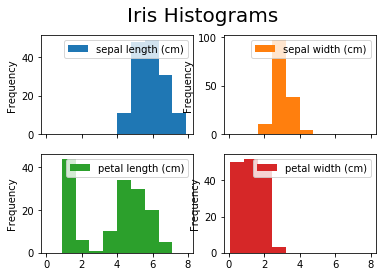

In [4]:
#Histogram plot
plt.close()
df.plot(kind='hist', subplots=True, layout=(2,2))
plt.suptitle('Iris Histograms', fontsize=20)
plt.show()

for spec in df['species'].unique():
  forspec = df[df['species']==spec]
  forspec['petal length (cm)'].plot(kind='hist', 
                                    alpha=0.4, label=spec)
  plt.legend(loc = 'upper right')
  plt.suptitle('Petal Length by Species')
  plt.savefig('iris_hist_by_spec.jpg')

In the Histogram it can be seen that the amount of samples from which ever species at a specified length and width is counted, displayed as frequency. Therefore the mean can be seen in these charts. It is important in a histogram to have axes and titles.

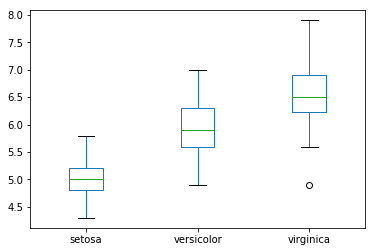

In [5]:
#Boxplot
plt.close()
col = 'sepal length (cm)'
df['ind'] = pd.Series(df.index).apply(lambda i: i% 50)
df.pivot('ind','species')[col].plot(kind='box')
plt.savefig('iris_box.jpg')
plt.show()

In the boxplot it can be seen that each species is different. Outliers, min and max can be seen from this chart. It is important to have axes on this plot and a correct scale.

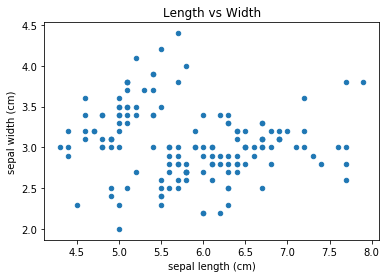

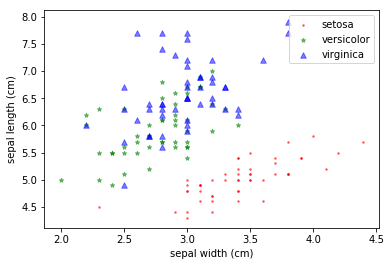

In [6]:
#Scatter plot
plt.close()
df.plot(kind="scatter",
    x="sepal length (cm)", y="sepal width (cm)")
plt.title("Length vs Width")
plt.savefig('iris_Scatter_LvsW.jpg')
plt.show()

plt.close()
colors = ["r", "g", "b"]
markers= [".", "*", "^"]
fig, ax = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique() ):
  ddf = df[df['species']==spec]
  ddf.plot(kind="scatter",
    x="sepal width (cm)", y="sepal length (cm)",
    alpha=0.5, s=10*(i+1), ax=ax,
    color=colors[i], marker=markers[i], label=spec)
plt.legend()
plt.savefig('iris_Scatter_Diff_markers.jpg')
plt.show()

In the scatterplot a relationship between the variables and the distrubution of the data can be seen. It can be seen from this that there is a slight correlation between the width and length of the sepal. The larger the width the larger the length. In this type of plot the axes are import along with titles and color. Markers can also be important if more that one category is used. 

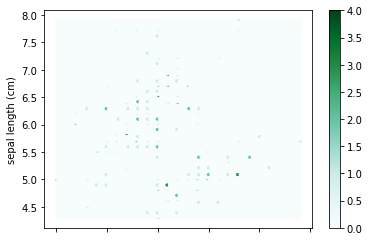

In [7]:
#Heatmap
plt.close()
df.plot(kind="hexbin",
    x="sepal width (cm)", y="sepal length (cm)")
plt.savefig('iris_Heatmap.jpg')
plt.show()

The heatmap is a lot like the scatterplot butmore zoomed out and it shows the consistency of the samples. If a lot of data is at the same point the marker is darker and larger. 

C:\Users\user1\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


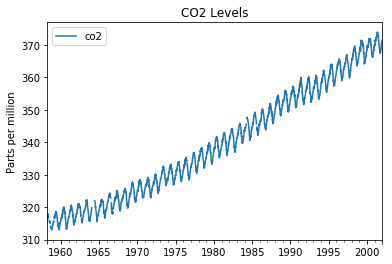

In [8]:
#Time Series
import statsmodels.api as sm
dta = sm.datasets.co2.load_pandas().data
dta.plot()
plt.title("CO2 Levels")
plt.ylabel("Parts per million")
plt.savefig('iris_TimeSeries.jpg')
plt.show()
dta.to_csv("datasetCO2.csv",index=False)

The time series plot shows th echanges of a period of time. From this it can be seen that over the year the CO2 levels have been increasing.